In [1]:
!pip install kaggle

### Downloading and Extracting the dataset

In [2]:
downloading the dataset from kaggle via kaggle API

!kaggle datasets download -d hijest/genre-classification-dataset-imdb

In [3]:
# Extracting the zipfile

from zipfile import ZipFile

dataset = 'genre-classification-dataset-imdb.zip'

with ZipFile(dataset, "r") as zip:
    zip.extractall()
    print("Dataset Extracted Successfully")

### Importing necessary libraries

In [61]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

#### Loading train data

In [5]:
#training data path
train_data_path = "Genre Classification Dataset/train_data.txt"

#Converting the dataset into csv file
train_data = pd.read_csv(train_data_path, sep = " ::: ", names = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine = 'python') #using 'engine = python' to avoid warning

In [6]:
#Checking top 10 rows
train_data.head(10)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm s...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all ...
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen w...
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss ..."
9,10,Spirits (2014/I),horror,Four high school students embark on a terrifyi...


In [7]:
#Checking the last 10 rows
train_data.tail(10)

,ID,TITLE,GENRE,DESCRIPTION
54204,54205,Pogrindis.NET (2013),short,Young looser filmmaker tries to produce a film...
54205,54206,Counting Sheep (2004),documentary,Bighorn sheep once roamed the Sierra Nevada in...
54206,54207,The Devin Townsend Project: By a Thread - Live...,music,"In November 2011, The Devin Townsend Project p..."
54207,54208,Kaçamak (1988),drama,A man and woman meet during the identification...
54208,54209,Izpiti po nikoe vreme (1974),family,"First story, ""Temptation"": Two kids find a wal..."
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense h..."


In [8]:
#Checking random rows from the dataset
train_data.sample(10)

,ID,TITLE,GENRE,DESCRIPTION
30408,30409,Andy Peters: Exclamation Mark Question Point (...,comedy,Exclamation Mark Question Point is the debut s...
39203,39204,Incubus (2002),horror,Johan (Carsten Frank) is a successful artist w...
7645,7646,Psychoanalysis Changed My Life (2003),short,"Marianne Loewe, a recently divorced, rather up..."
4032,4033,"""Eating Alive"" (2002)",talk-show,So what is The Eating Alive System? It is a nu...
3309,3310,"""Airshow Extreme"" (2012)",history,This exciting new series offers a bird's eye v...
25738,25739,Tomb Raider: Are You Game? (2001),short,This making-of documentary takes a short look ...
12795,12796,"Cinema, mon amour (2015)",documentary,"Cinema, Mon Amour follows the story of Viktor ..."
13780,13781,Glenn & Linus Michael Attend the Million Man M...,documentary,"Glenn Towery, (an African American) and Linus ..."
39692,39693,Veer Ghatotkach (1970),adventure,Before the epic battle between the Kauravs and...
45768,45769,Into the Fire: American Women in the Spanish C...,documentary,"In 1936, a right-wing military coup tried to o..."


In [9]:
#Checking the shape of the dataset
train_data.shape

(54214, 4)

In [10]:
#describing the dataset
train_data[['TITLE', 'GENRE', 'DESCRIPTION']].describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Nature's Fury: Storm of the Century (2006),drama,Grammy - music award of the American academy o...
freq,1,13613,12


Note: Describing the id column wont be of any use

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


Only ID column has 'int' datatype

In [12]:
#Checking for null values throughout the dataset
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

Great! No null values

#### Loading the test dataset

In [13]:
#test dataset path
test_data_path = "Genre Classification Dataset/test_data.txt"

#Reading the test data using pandas

test_data = pd.read_csv(test_data_path, sep = " ::: ", names = ['ID', 'TITLE', 'DESCRIPTION'], engine = 'python') #Using 'engine = python' to avoid warning

In [14]:
#Checking top 10 rows
test_data.head(10)

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room wi...
6,7,L'amica (1969),The beautiful but neglected wife of a brillian...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder whe...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal R...
9,10,Press (2011),Press is a story of young people overwhelmed b...


In [15]:
#Checking last 10 rows
test_data.tail(10)

,ID,TITLE,DESCRIPTION
54190,54191,"""House Invaders"" (1998)",House Invaders features a different home each ...
54191,54192,Eduardo Ducay. El cine que siempre estuvo ahí ...,Visual documentary about the figure of produce...
54192,54193,Dinosaurs Decoded (2009),National Geographic reviews Jack Horner's rese...
54193,54194,The World of Art Presents: Drawing for Anyone ...,Jump right in to drawing animals along with Ch...
54194,54195,Slender Existence (2000),Slender Existence is the first-ever personal f...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ..."
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms a..."


In [16]:
#Checking 10 random rows
test_data.sample(10)

,ID,TITLE,DESCRIPTION
13040,13041,La castración (2011),"Lourdes is almost 24, works at a casting agenc..."
53443,53444,6 Feet Below Hell (2017),When Islamic Terrorists hired by Russians set ...
40435,40436,Marianne et Sophie (2011),Sophie and Marianne are work colleagues and be...
37199,37200,Iris (????/III),"Iris and Tom, a married couple in their early ..."
28155,28156,No Limit: A Search for the American Dream on t...,Is high-stakes poker a metaphor for the Americ...
8929,8930,Soul of an Artist (2017),Everyone is creative in one way or another. Bu...
23398,23399,Mushukunin mikogami no jôkichi: Tasogare ni se...,"In feudal Japan, women are vulnerable, in need..."
18762,18763,The Called (????),THE CALLED follows two men whose childhood Oui...
24437,24438,The Americans in the Bulge (2010),Battlefield guide Ellwood Von Siebold takes us...
7645,7646,Vamik's Room (2016),A film about 5-time Nobel Peace Prize nominee ...


#### EDA and Data Vizualization

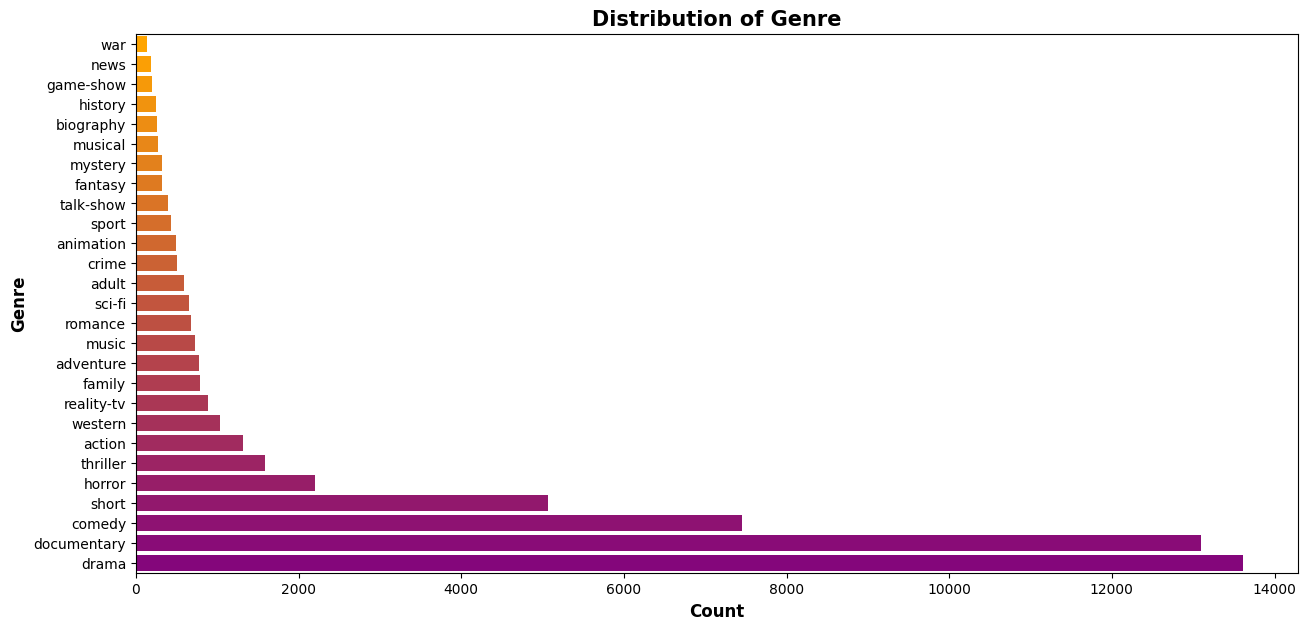

In [17]:
#Describing the figure size
plt.figure(figsize = (15, 7))

#Creating the countplot
sns.countplot(data = train_data, y = 'GENRE', hue = None,order = train_data['GENRE'].value_counts().index[::-1])

#Access the matplotlib axes
ax = plt.gca()

#create a colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["orange", "purple"])

#Iterate over the bars and set colors
for i, bar in enumerate(ax.patches):
    color = cmap(i/len(ax.patches))
    bar.set_facecolor(color)

#set title for the plot
plt.title('Distribution of Genre', fontsize = 15, fontweight = 'bold')
#set label for x axis
plt.xlabel('Count', fontsize = 12, fontweight = 'bold')
#set label for y axis
plt.ylabel('Genre', fontsize = 12, fontweight = 'bold')
plt.show()

In [18]:
train_data['DESCRIPTION_LENGTH'] = train_data['DESCRIPTION'].str.len()
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_LENGTH
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624


In [19]:
train_data['DESCRIPTION_LENGTH'].describe()

count    54214.000000
mean       599.452429
std        446.026620
min         41.000000
25%        324.000000
50%        463.000000
75%        712.000000
max      10503.000000
Name: DESCRIPTION_LENGTH, dtype: float64

Text(0, 0.5, 'Frequency')

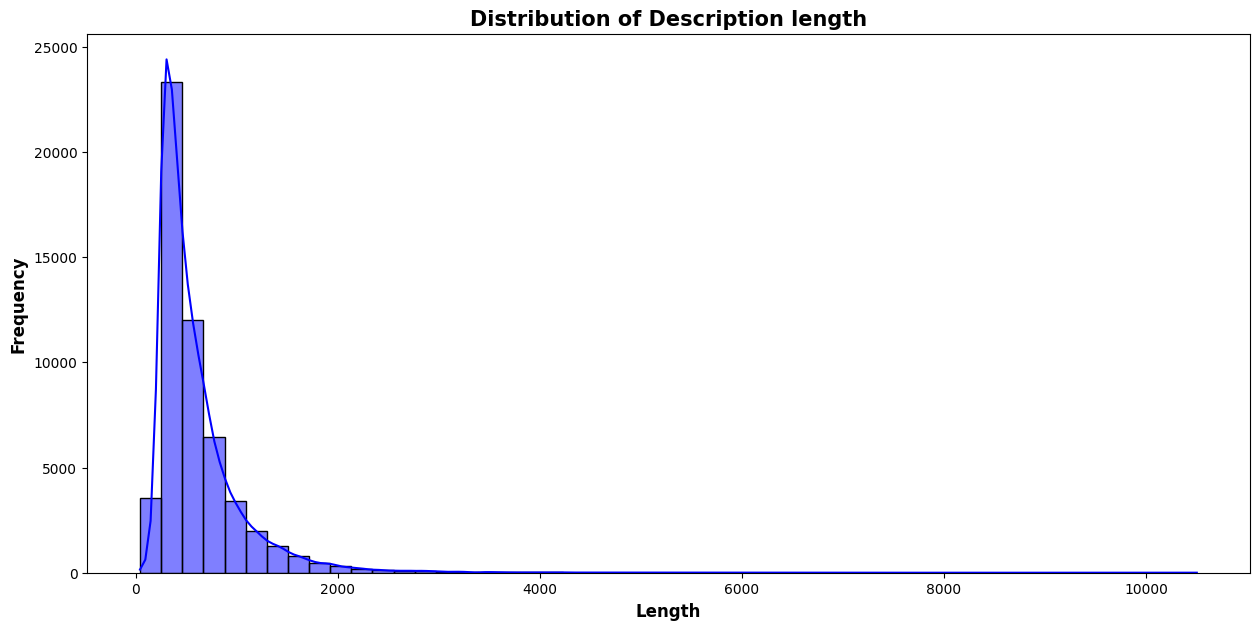

In [20]:
plt.figure(figsize = (15, 7))

#plot histogram
sns.histplot(data = train_data, x = 'DESCRIPTION_LENGTH', kde = True, bins = 50, color = 'blue')

#set title
plt.title('Distribution of Description length', fontsize = 15, fontweight = 'bold')

#set label for x axis
plt.xlabel('Length', fontsize = 12, fontweight = 'bold')

#set label for y axis
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold')



Text(0.5, 0, 'Length')

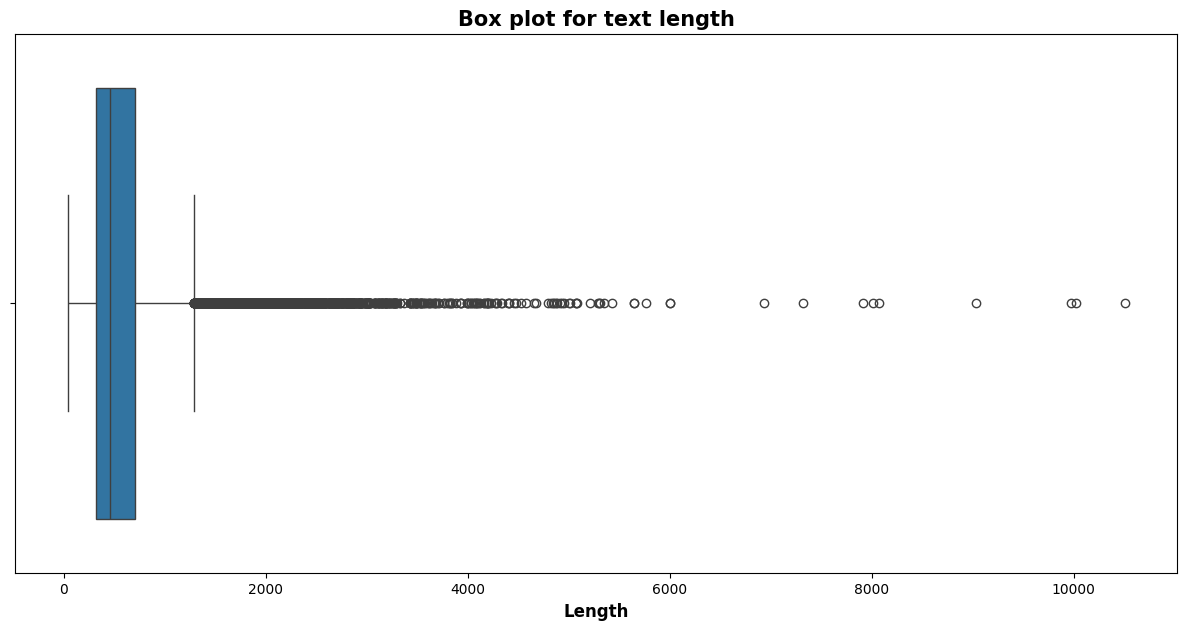

In [42]:
plt.figure(figsize = (15, 7))

#Plot Boxplot
sns.boxplot(x = train_data['DESCRIPTION_LENGTH'])

#set title
plt.title('Box plot for text length', fontsize = 15, fontweight = 'bold')

#set label for x axis
plt.xlabel('Length', fontsize = 12, fontweight = 'bold')


In [57]:
len(train_data[train_data['DESCRIPTION_LENGTH'] > 2000])

863

In [22]:
len(train_data[(train_data['DESCRIPTION_LENGTH'] > 4000) & (train_data['DESCRIPTION_LENGTH'] < 10000)])

67

#### Data Cleaning and Preprocessing

In [23]:
# nltk.download('stopwords')
# nltk.download('punkt')

In [24]:
stemmer = LancasterStemmer()
stopwords = set(stopwords.words('english'))

In [25]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [26]:
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)  # Remove image URLs
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only alphabetic characters and apostrophes
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Remove single characters
    text = "".join([i for i in text if i not in string.punctuation])  # Remove punctuation
    words = nltk.word_tokenize(text)  # Tokenize text into words
    stopwords = nltk.corpus.stopwords.words('english')  # List of stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])  # Remove stopwords and short words
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove extra spaces
    return text

In [27]:
# nltk.download('all')

In [28]:
#Apply clean_text function to description column of train and test data

train_data['CLEANED_DESCRIPTION'] = train_data['DESCRIPTION'].apply(clean_text)
test_data['CLEANED_DESCRIPTION'] = test_data['DESCRIPTION'].apply(clean_text)


In [29]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_LENGTH,CLEANED_DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545,listening conversation doctor parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624,films title refers recovered bodies ground zer...


In [30]:
train_data.tail()

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_LENGTH,CLEANED_DESCRIPTION
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...,506,short lived nbc live sitcom centered bonino wo...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...,780,next generation exploitation sisters kapa bay ...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr...",254,bestaan echt stand comedy growing facing fears...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,641,walter vivian live country difficult time keep...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense h...",310,labor day weekend intense hurricane ever make ...


In [31]:
test_data.head()

,ID,TITLE,DESCRIPTION,CLEANED_DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a marti...,known internationally martial arts superstar b...


In [32]:
test_data.tail()

,ID,TITLE,DESCRIPTION,CLEANED_DESCRIPTION
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar...",covering multiple genres tales light dark anth...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...,alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,...",movie years making oliver twist artful dodger ...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ...",popular mysterious rock mike mallard askew bro...
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms a...",curitiba city movement rhythms different pulsa...


In [33]:
train_data['CLEANED_DESCRIPTION_LENGTH'] = train_data['CLEANED_DESCRIPTION'].str.len()

In [34]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_LENGTH,CLEANED_DESCRIPTION,CLEANED_DESCRIPTION_LENGTH
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545,listening conversation doctor parents year old...,383
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183,brother sister past incestuous relationship cu...,119
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649,bus empties students field trip museum natural...,402
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081,help unemployed father make ends meet edith tw...,745
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624,films title refers recovered bodies ground zer...,402


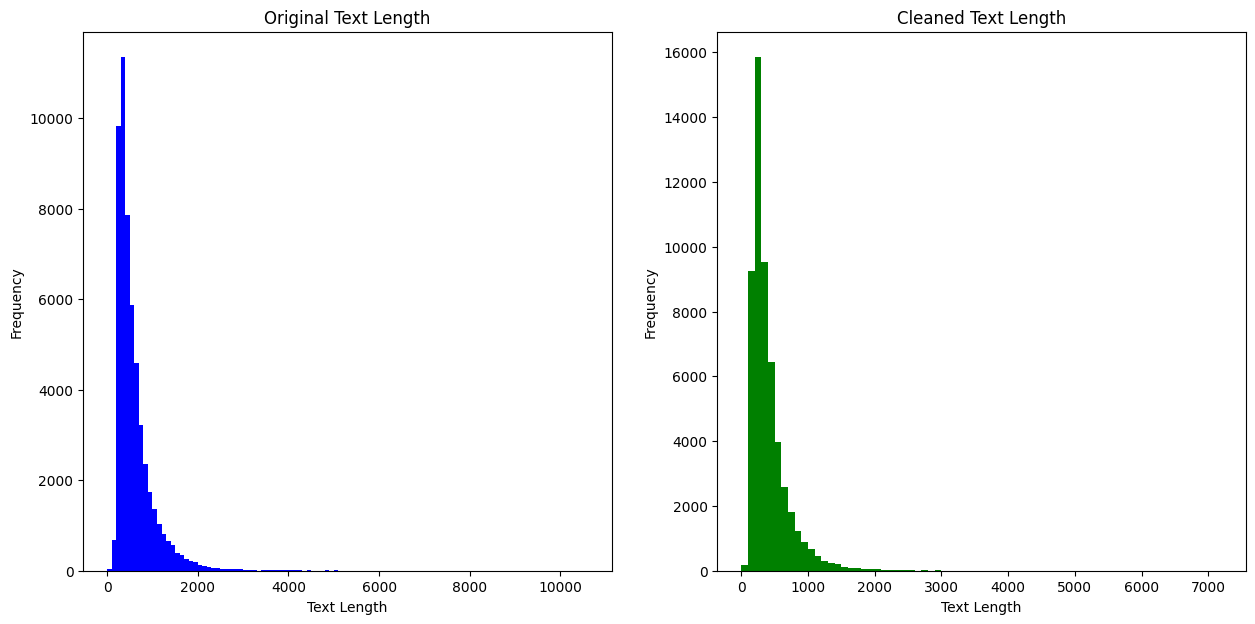

In [43]:
plt.figure(figsize = (15, 7))

#plot Histogram for Original Text length
plt.subplot(1, 2, 1)
plt.hist(train_data['DESCRIPTION_LENGTH'], bins = range(0, max(train_data['DESCRIPTION_LENGTH']) + 100, 100), color = 'blue')
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')


#plot Histogram for Cleaned Text length
plt.subplot(1, 2, 2)
plt.hist(train_data['CLEANED_DESCRIPTION_LENGTH'], bins = range(0, max(train_data['CLEANED_DESCRIPTION_LENGTH']) + 100, 100), color = 'green')
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.show()


In [47]:
train_data['CLEANED_DESCRIPTION_LENGTH'].describe()

count    54214.000000
mean       408.934279
std        302.004272
min         23.000000
25%        222.000000
50%        315.000000
75%        488.000000
max       7105.000000
Name: CLEANED_DESCRIPTION_LENGTH, dtype: float64

In [56]:
len(train_data[train_data['CLEANED_DESCRIPTION_LENGTH'] > 2000])

200

In [51]:
len(train_data[(train_data['CLEANED_DESCRIPTION_LENGTH'] > 3000) & (train_data['CLEANED_DESCRIPTION_LENGTH'] < 7000)])

39

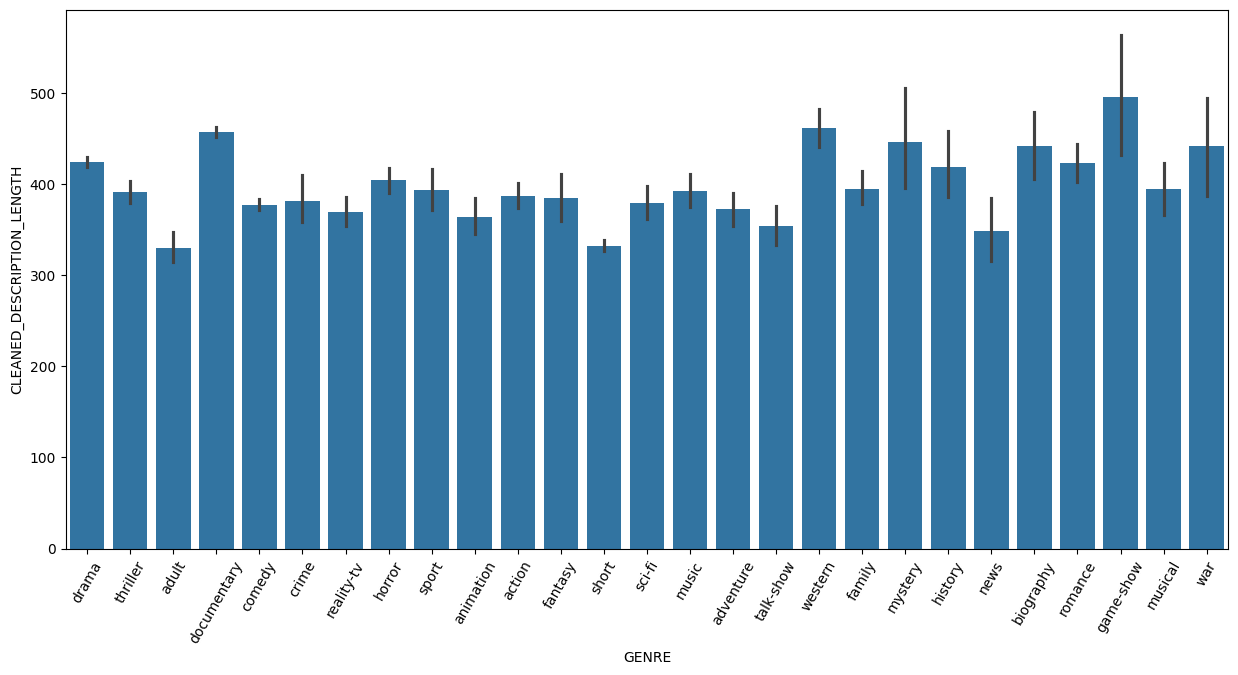

In [60]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'GENRE' ,y = 'CLEANED_DESCRIPTION_LENGTH' ,data = train_data) 
plt.xticks(rotation = 60)
plt.show()

### Text Vectorization using TF-IDF

In [62]:
#Initializing the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [63]:
#Fit and transform the training and testing data
X_train = vectorizer.fit_transform(train_data['CLEANED_DESCRIPTION'])
X_test = vectorizer.transform(test_data['CLEANED_DESCRIPTION'])

#### Train-Test split

In [66]:
X = X_train
y = train_data['GENRE']

In [67]:
X_train, X_value, y_train, y_value = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [71]:
#Checking the shapes after the train test split to avoid dimenstionality issues
print("Shapes after the Train Test split")
print(f'X_train : {X_train.shape}')
print(f'X_value : {X_value.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_value : {y_value.shape}')

Shapes after the Train Test split
X_train : (43371, 124210)
X_value : (10843, 124210)
y_train : (43371,)
y_value : (10843,)


#### Naive Bayes Classifier

In [72]:
#Initialize the Multinomial Naive Bayes Classifer
classifier_1 = MultinomialNB()

In [73]:
#Train the model
classifier_1.fit(X_train, y_train)

MultinomialNB()

In [74]:
#Predicting on validation set
y_pred = classifier_1.predict(X_value)

In [75]:
#Evaluation of the model
accuracy = accuracy_score(y_value, y_pred)
print("Accurracy of the model: ", accuracy)

Accurracy of the model:  0.44526422576777647


In [76]:
print(classification_report(y_value, y_pred))

              precision    recall  f1-score   support

      action       0.00      0.00      0.00       263
       adult       0.00      0.00      0.00       112
   adventure       0.00      0.00      0.00       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.61      0.04      0.07      1443
       crime       0.00      0.00      0.00       107
 documentary       0.54      0.90      0.67      2659
       drama       0.38      0.88      0.53      2697
      family       0.00      0.00      0.00       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.00      0.00      0.00        40
     history       0.00      0.00      0.00        45
      horror       0.00      0.00      0.00       431
       music       0.00      0.00      0.00       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00        56
        news       0.00    

c:\Users\shiva\envs\encryp\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiva\envs\encryp\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiva\envs\encryp\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Test Data Prediction

In [77]:
X_test_pred = classifier_1.predict(X_test)

In [78]:
test_data['PREDICTED_GENRE'] = X_test_pred

In [79]:
test_data.head()

,ID,TITLE,DESCRIPTION,CLEANED_DESCRIPTION,PREDICTED_GENRE
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart...",brane loves life car apartment job especially ...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...,one year life albin family shepherds north tra...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his...",father died hasnt spoken brother years serious...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a marti...,known internationally martial arts superstar b...,drama


In [80]:
test_data.sample(10)

,ID,TITLE,DESCRIPTION,CLEANED_DESCRIPTION,PREDICTED_GENRE
53308,53309,Zhu Fu (1956),"Before the Revolution of 1911, widow Aunt Xian...",revolution widow aunt xianglin heard mother la...,drama
22571,22572,Jenny Dixon Beach (2011),Jasmine Taylor goes missing while hitch hiking...,jasmine taylor goes missing hitch hiking home ...,drama
12972,12973,Mike V's Greatest Hits (2003),Professional skateboarder and legendary bad as...,professional skateboarder legendary bad ass mi...,documentary
49133,49134,Eternity (1990/II),TV producer James has an extremely vivid dream...,producer james extremely vivid dream prince st...,drama
38824,38825,Godzilla (1977),"In 1977, the film was purchased and colorized ...",film purchased colorized luigi cozzi terrible ...,documentary
13653,13654,The Dark Return of Time (????),Flavian Bennett is trying to leave his trouble...,flavian bennett trying leave troubled past beh...,drama
43102,43103,150 Years of Photography: An American Image (1...,The true magic of photography is represented i...,true magic photography represented kaleidoscop...,documentary
42188,42189,"""Jefferson Drum"" (1958)","Pete Henke, a violent sharpshooter, comes to t...",pete henke violent sharpshooter comes town imm...,drama
35521,35522,Magia nuda (1975),This film is about tribes in Africa and South ...,film tribes africa south america turn toward m...,documentary
25134,25135,Sélect Hôtel (1996),It's a hotel with walls in the corridor covere...,hotel walls corridor covered striped paper cro...,drama


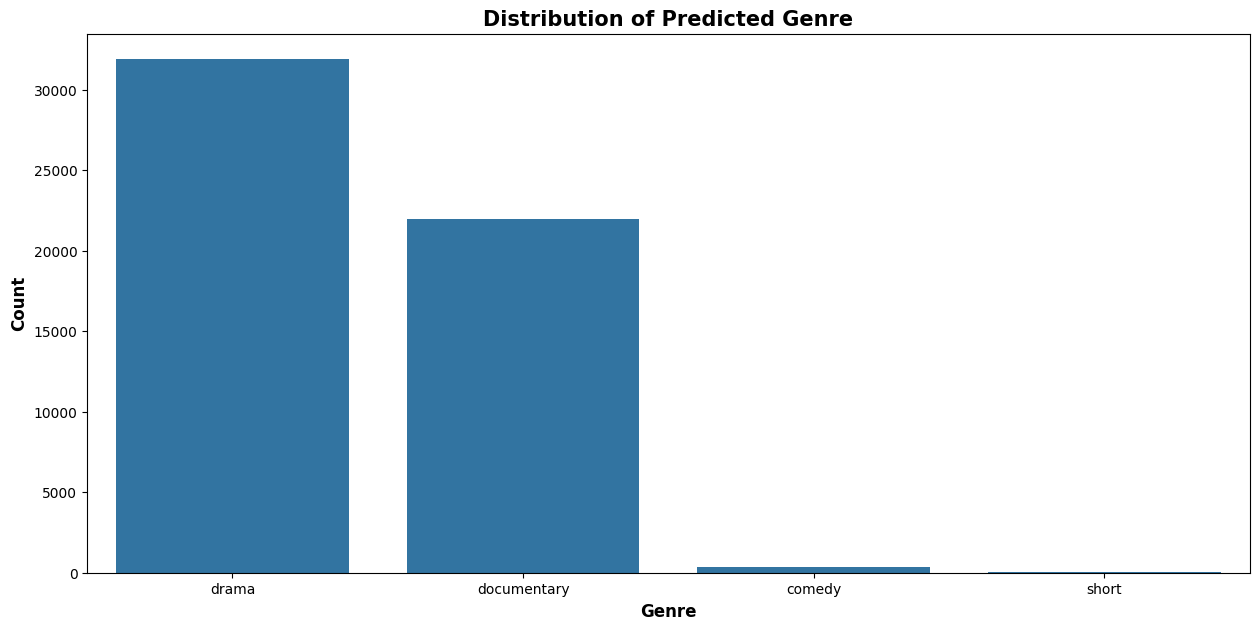

In [84]:
# Visualize the distribution of predicted genres
#Describing the figure size
plt.figure(figsize = (15, 7))

#Creating the countplot
sns.countplot(data = test_data, x = 'PREDICTED_GENRE')

#set title for the plot
plt.title('Distribution of Predicted Genre', fontsize = 15, fontweight = 'bold')
#set label for x axis
plt.xlabel('Genre', fontsize = 12, fontweight = 'bold')
#set label for y axis
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.show()

In [89]:
#Getting value count of the predicted genre
test_data['PREDICTED_GENRE'].value_counts()

PREDICTED_GENRE
drama          31889
documentary    21962
comedy           329
short             20
Name: count, dtype: int64

##### Reference

1. https://www.kaggle.com/faroukfadelbrachemi
2. https://www.youtube.com/watch?v=ATK6fm3cYfI